In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sns.set_style("whitegrid")

In [3]:
hero_df = pd.read_csv(r"dota-2-matches\hero_names.csv")

In [4]:
hero_df.columns

Index(['name', 'hero_id', 'localized_name'], dtype='object')

In [5]:
players_df = pd.read_csv(r"dota-2-matches\players.csv")

In [6]:
player_hero_df = pd.merge(players_df, hero_df, how="left", left_on="hero_id", right_on="hero_id")

In [7]:
player_hero_df = player_hero_df[['match_id','localized_name','player_slot']]

In [8]:
player_hero_df['player_slot'].unique()

array([  0,   1,   2,   3,   4, 128, 129, 130, 131, 132], dtype=int64)

In [9]:
player_hero_df[player_hero_df['localized_name'].isnull()].head()

,match_id,localized_name,player_slot
7203,720,NaN,3
10320,1032,NaN,0
11088,1108,NaN,131
21343,2134,NaN,3
21344,2134,NaN,4


In [10]:
player_hero_df = player_hero_df.fillna(1)

In [11]:
player_hero_df['contains_null'] = player_hero_df['localized_name'].apply(lambda x: 1 if x == 1 else 0)

In [12]:
player_hero_df = player_hero_df.groupby('match_id').filter(lambda x: x['contains_null'].sum() == 0)

In [13]:
player_hero_df['contains_null'].unique()

array([0], dtype=int64)

In [14]:
hero_counts = player_hero_df[['match_id', 'localized_name','player_slot']]

In [15]:
hero_counts.head()

,match_id,localized_name,player_slot
0,0,Rubick,0
1,0,Clockwerk,1
2,0,Treant Protector,2
3,0,Shadow Fiend,3
4,0,Spectre,4


In [16]:
hero_counts['match_id'].max()
hero_counts[hero_counts['localized_name'] == 'Windranger'].count()

match_id          20869
localized_name    20869
player_slot       20869
dtype: int64

0.4


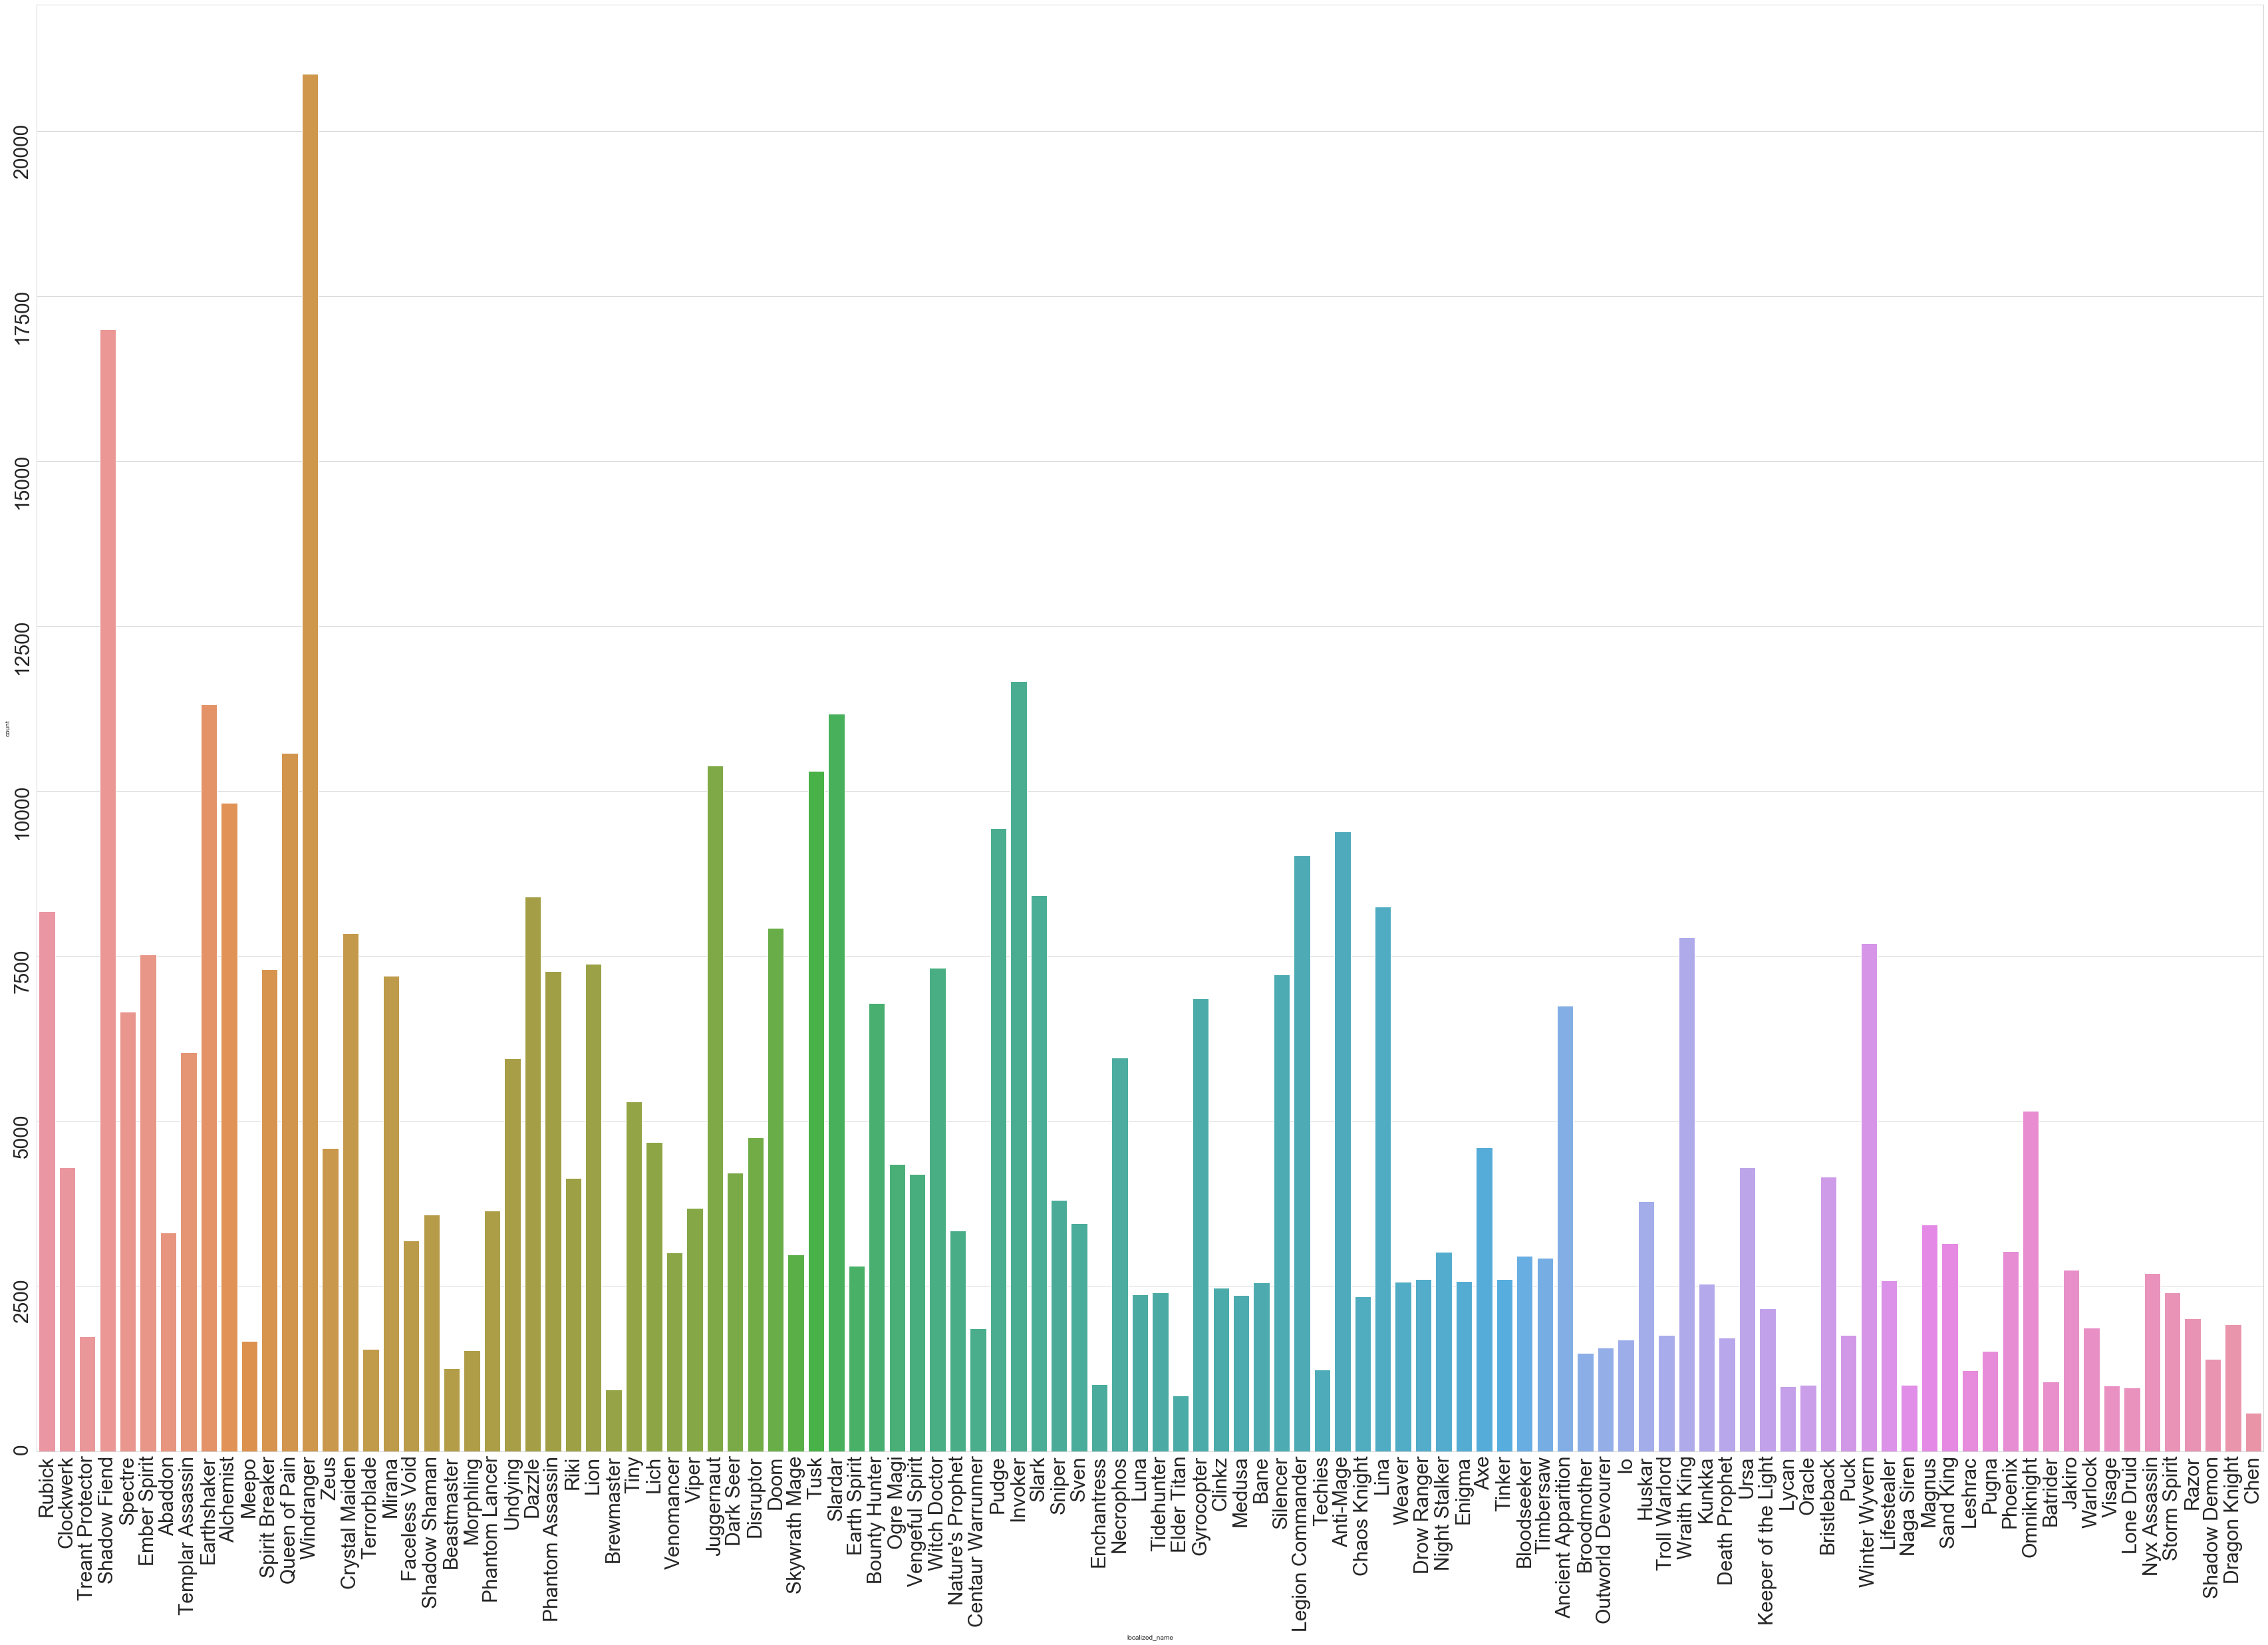

In [17]:
fig = plt.figure(figsize=(60,40))

sns.countplot(hero_counts['localized_name'])
plt.xticks(rotation=90, size=30)
plt.yticks(rotation=90, size=30)

print(20000/50000)

In [18]:
hero_counts.head()

,match_id,localized_name,player_slot
0,0,Rubick,0
1,0,Clockwerk,1
2,0,Treant Protector,2
3,0,Shadow Fiend,3
4,0,Spectre,4


In [19]:
hero_counts['match_id'].max()

49999

In [20]:
len(hero_counts['player_slot'])

499650

In [21]:
hero_counts['player_slot'][1]

1

In [22]:
hero_counts.head(10)

,match_id,localized_name,player_slot
0,0,Rubick,0
1,0,Clockwerk,1
2,0,Treant Protector,2
3,0,Shadow Fiend,3
4,0,Spectre,4
5,0,Ember Spirit,128
6,0,Abaddon,129
7,0,Templar Assassin,130
8,0,Earthshaker,131
9,0,Alchemist,132


In [23]:
def team_id_decider(df):

    if df['player_slot'] < 5:
        return df['match_id']
    else:
        return df['match_id'] + 50000



hero_counts['team_id'] = hero_counts.apply(team_id_decider, axis=1)

In [24]:
hero_counts.head(10)

,match_id,localized_name,player_slot,team_id
0,0,Rubick,0,0
1,0,Clockwerk,1,0
2,0,Treant Protector,2,0
3,0,Shadow Fiend,3,0
4,0,Spectre,4,0
5,0,Ember Spirit,128,50000
6,0,Abaddon,129,50000
7,0,Templar Assassin,130,50000
8,0,Earthshaker,131,50000
9,0,Alchemist,132,50000


In [25]:
hero_counts = hero_counts[['localized_name', 'team_id']]

In [26]:
hero_counts.set_index('team_id', inplace=True)

In [27]:
hero_counts.head(10)

,localized_name
team_id,
0,Rubick
0,Clockwerk
0,Treant Protector
0,Shadow Fiend
0,Spectre
50000,Ember Spirit
50000,Abaddon
50000,Templar Assassin
50000,Earthshaker


In [28]:
team_df = hero_counts.groupby('team_id').agg(lambda x: ', '.join(x))

In [29]:
team_df.head()

,localized_name
team_id,
0,"Rubick, Clockwerk, Treant Protector, Shadow Fi..."
1,"Earthshaker, Meepo, Spirit Breaker, Queen of P..."
2,"Clockwerk, Terrorblade, Mirana, Faceless Void,..."
3,"Dazzle, Phantom Assassin, Riki, Lion, Queen of..."
4,"Juggernaut, Queen of Pain, Dark Seer, Disrupto..."


In [30]:
team_df.loc[0,'localized_name']

'Rubick, Clockwerk, Treant Protector, Shadow Fiend, Spectre'

In [31]:
team_df.to_csv(r"Hero_Drafting.csv", sep=',')